# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

This project is modeled to predict the price of a used car depending on various factors. We will explore the data, identify important features and determinte their importance in pricing. We aim to create a model that can predict used car pricing and provide recommendations to a used car dealership as to what consumers value in a car. 

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
used_cars = pd.read_csv('data/vehicles.csv')

In [3]:
# Examine data
used_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

Examining the data, we determine there are 18 columns (4 numerical, and 14 catergories). The columns consist of `id`, `region`, `price`, `year`, `manufacturer`, `model`, `condition`, `cylinders`, `fuel`, `odometer`, `title_status`, `transmission`, `VIN`, `drive`, `size`, `type`, `paint_color`, `state`.

In [4]:
# Sample the data
used_cars.sample(10)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
73554,7313147926,colorado springs,14990,2014.0,kia,soul,NaN,4 cylinders,gas,24329.0,clean,automatic,NaN,fwd,compact,wagon,yellow,co
81823,7315342079,western slope,1200,2000.0,mercury,mountaineer,NaN,NaN,gas,187350.0,clean,automatic,4M2DU86P3YUJ09110,4wd,mid-size,SUV,white,co
349387,7314767713,myrtle beach,11900,2012.0,chevrolet,traverse,NaN,NaN,gas,145459.0,clean,automatic,1GNKRJED0CJ161812,fwd,NaN,NaN,white,sc
121478,7316749083,atlanta,11999,2013.0,cadillac,cts,good,10 cylinders,gas,68786.0,clean,automatic,1G6DS1E32D0106267,4wd,mid-size,coupe,white,ga
42430,7315123313,orange county,3200,2001.0,toyota,sequoia,NaN,8 cylinders,gas,260000.0,clean,automatic,NaN,fwd,NaN,NaN,NaN,ca
193690,7316050344,ann arbor,8000,2013.0,chevrolet,cruze,good,4 cylinders,gas,75221.0,clean,manual,NaN,fwd,mid-size,sedan,black,mi
330013,7301617058,harrisburg,32990,2015.0,chevrolet,ss sedan 4d,good,8 cylinders,gas,84498.0,clean,automatic,6G3F15RW8FL107349,rwd,NaN,sedan,green,pa
263928,7314538351,albany,27893,2020.0,ford,escape se awd,like new,3 cylinders,gas,5141.0,clean,automatic,1FMCU9G6XLUA90430,4wd,compact,SUV,white,ny
166095,7312936531,"kansas city, MO",28988,2019.0,chevrolet,colorado,NaN,NaN,diesel,68759.0,clean,automatic,1GCGTCEN7K1102551,NaN,NaN,NaN,NaN,ks
38875,7307905483,modesto,8498,2014.0,subaru,forester,excellent,NaN,gas,156467.0,clean,automatic,JF2SJAEC9EH400342,4wd,NaN,wagon,grey,ca


Taking a sample of the data, we see many columns with missing data.

In [5]:
# Check how many unique VINs are in the dataset
used_cars["VIN"].nunique()

118246

In [6]:
# Check for missing values, and express that as a percentage of the dataset
missing_percentage = used_cars.isnull().sum()/len(used_cars)*100

# Sort the percentages in descending order
sorted_missing_percentage = missing_percentage.sort_values(ascending=False)

# Display the sorted result
print(sorted_missing_percentage)

size            71.767476
cylinders       41.622470
condition       40.785232
VIN             37.725356
drive           30.586347
paint_color     30.501078
type            21.752717
manufacturer     4.133714
title_status     1.930753
model            1.236179
odometer         1.030735
fuel             0.705819
transmission     0.598763
year             0.282281
id               0.000000
region           0.000000
price            0.000000
state            0.000000
dtype: float64


In [7]:
# Describe the numerical data
used_cars.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [8]:
# Describe the non numerical data
used_cars.describe(include=[object])


,region,manufacturer,model,condition,cylinders,fuel,title_status,transmission,VIN,drive,size,type,paint_color,state
count,426880,409234,421603,252776,249202,423867,418638,424324,265838,296313,120519,334022,296677,426880
unique,404,42,29649,6,8,5,6,3,118246,3,4,13,12,51
top,columbus,ford,f-150,good,6 cylinders,gas,clean,automatic,1FMJU1JT1HEA52352,4wd,full-size,sedan,white,ca
freq,3608,70985,8009,121456,94169,356209,405117,336524,261,131904,63465,87056,79285,50614


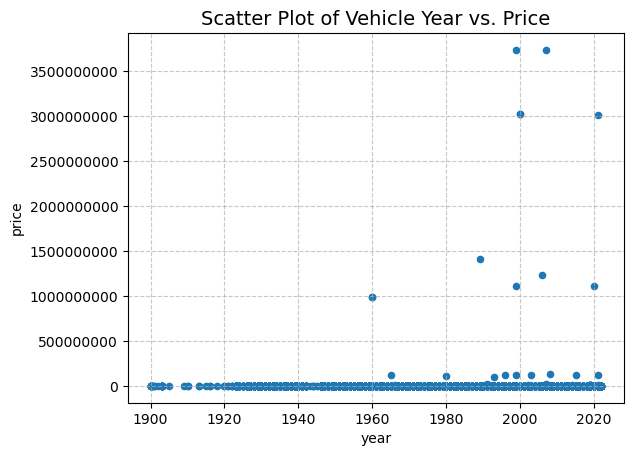

In [9]:
# Create a scatter plot of vehicle year vs price
used_cars[["year", "price"]].plot(kind="scatter", x = "year", y = "price" )
plt.title('Scatter Plot of Vehicle Year vs. Price', fontsize=14)
plt.ticklabel_format(style='plain', axis='y') 
plt.grid(True, linestyle='--', alpha=0.7)

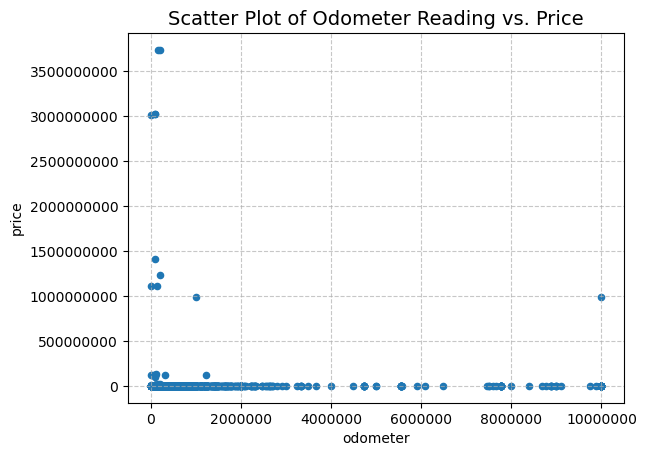

In [10]:
# Create a scatter plot of odometer reading vs price
used_cars[["odometer", "price"]].plot(kind="scatter", x = "odometer", y = "price" )
plt.title('Scatter Plot of Odometer Reading vs. Price', fontsize=14)
plt.ticklabel_format(style='plain', axis='y') 
plt.ticklabel_format(style='plain', axis='x') 
plt.grid(True, linestyle='--', alpha=0.7)

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

Based on the data exploration, we can see a few columns with a high percentage of missing data. 

| Column          | Missing Percentage (%) |
|-----------------|-------------------------|
| size            | 71.767476              |
| cylinders       | 41.622470              |
| condition       | 40.785232              |
| VIN             | 37.725356              |
| drive           | 30.586347              |
| paint_color     | 30.501078              |
| type            | 21.752717              |
| manufacturer    | 4.133714               |
| title_status    | 1.930753               |
| model           | 1.236179               |
| odometer        | 1.030735               |
| fuel            | 0.705819               |
| transmission    | 0.598763               |
| year            | 0.282281               |
| id              | 0.000000               |
| region          | 0.000000               |
| price           | 0.000000               |
| state           | 0.000000               |

Due to the high percentage of missing data, we will drop `size`, `cylinders`, `VIN`, 
    `drive`, `paint_color`, and `type`. We will also drop `id` as it is not useful in our calculation. We will keep condition as it may be useful in our model.

In [11]:
columns_to_drop = [
    'size', 'cylinders', 'VIN', 
    'drive', 'paint_color', 'type', 'id'
]

# Drop the columns from the used_cars datafram
used_cars_cleaned = used_cars.drop(columns=columns_to_drop)

# Verify the result
used_cars_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        426880 non-null  object 
 1   price         426880 non-null  int64  
 2   year          425675 non-null  float64
 3   manufacturer  409234 non-null  object 
 4   model         421603 non-null  object 
 5   condition     252776 non-null  object 
 6   fuel          423867 non-null  object 
 7   odometer      422480 non-null  float64
 8   title_status  418638 non-null  object 
 9   transmission  424324 non-null  object 
 10  state         426880 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 35.8+ MB


# Outliers 
Exploring the data earlier, we noticed significant outlies on price, odomerter and year. 

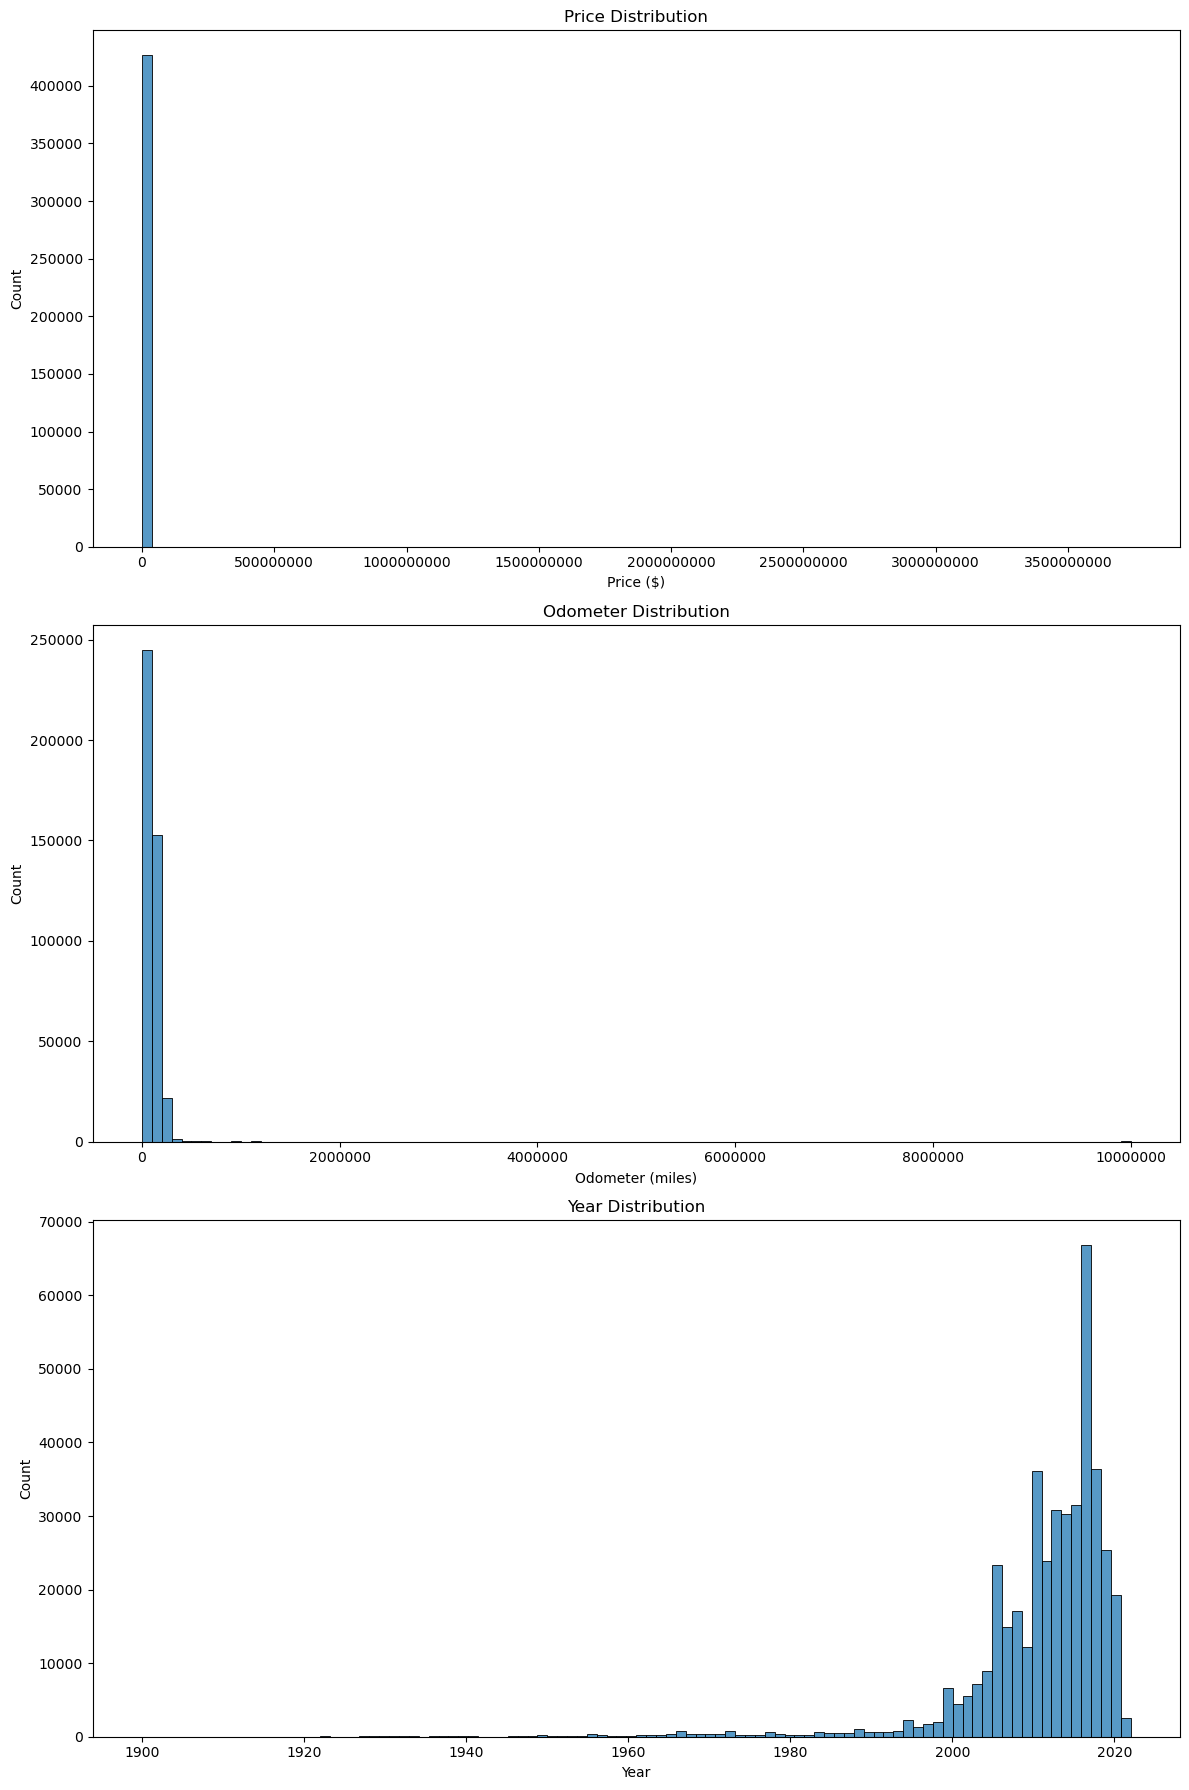

In [12]:
# Plot the distributions for price, odometer, and year

fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# Price distribution
sns.histplot(data=used_cars_cleaned, x='price', kde=False, bins=100, ax=axes[0])
axes[0].set_title('Price Distribution')
axes[0].set_xlabel('Price ($)')
axes[0].ticklabel_format(style='plain', axis='x')

# Odometer distribution
sns.histplot(data=used_cars_cleaned, x='odometer', kde=False, bins=100, ax=axes[1])
axes[1].set_title('Odometer Distribution')
axes[1].set_xlabel('Odometer (miles)')
axes[1].ticklabel_format(style='plain', axis='x')

# Year distribution
sns.histplot(data=used_cars_cleaned, x='year', kde=False, bins=100, ax=axes[2])
axes[2].set_title('Year Distribution')
axes[2].set_xlabel('Year')

plt.tight_layout()
plt.show()


We will set a minimum price of $500, and a max of $1,000,000 to address outliers, and then preform IQR

In [13]:

# Drop rows where price is 0 from the dataset, and price is > 1000000
used_cars_cleaned = used_cars_cleaned[(used_cars_cleaned['price'] >= 500) & (used_cars_cleaned['price'] <= 1000000)]


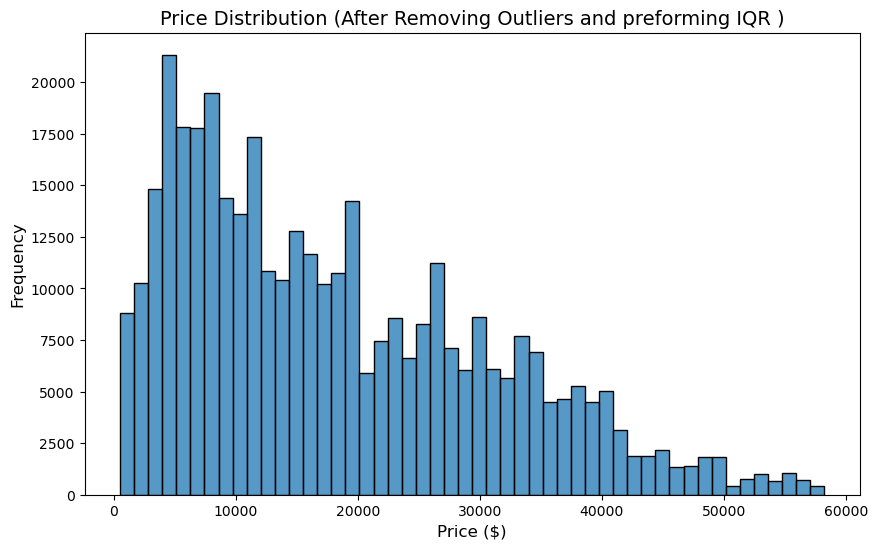

In [14]:
# Calculate Q1, Q3, and IQR
Q1 = used_cars_cleaned['price'].quantile(0.25)
Q3 = used_cars_cleaned['price'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
used_cars_cleaned = used_cars_cleaned[(used_cars_cleaned['price'] >= lower_bound) & (used_cars_cleaned['price'] <= upper_bound)]



# Plot the distribution for price after removing rows with price == 0
plt.figure(figsize=(10, 6))
sns.histplot(data=used_cars_cleaned, x='price', kde=False, bins=50)
plt.title('Price Distribution (After Removing Outliers and preforming IQR )', fontsize=14)
plt.xlabel('Price ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.ticklabel_format(style='plain', axis='x')  # Avoid scientific notation
plt.show()

Next we will address outliers for odometer. For our use case we will remove cars with greater than 350,000 miles, or less than 1.

In [ ]:
# Drop odometer outliers
used_cars_cleaned = used_cars_cleaned[(used_cars_cleaned['odometer'] > 0) & (used_cars_cleaned['odometer'] <= 350000)]


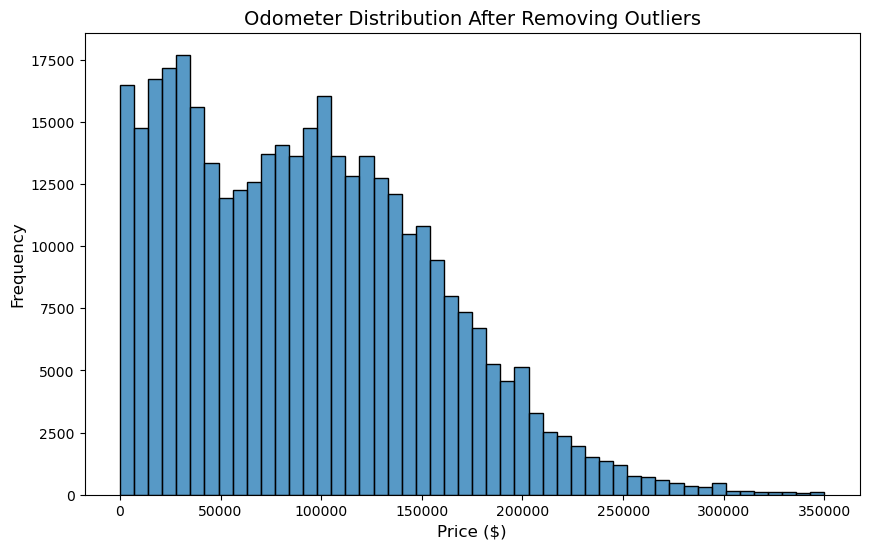

In [16]:
# Plot the distribution for price after removing rows with price == 0
plt.figure(figsize=(10, 6))
sns.histplot(data=used_cars_cleaned, x='odometer', kde=False, bins=50)
plt.title('Odometer Distribution After Removing Outliers', fontsize=14)
plt.xlabel('Price ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.ticklabel_format(style='plain', axis='x')  # Avoid scientific notation
plt.show()

Lastly we will preform IQR on year to normalize the dataset

In [17]:
used_cars_cleaned.describe()

Q1 = used_cars_cleaned['year'].quantile(0.25)
Q3 = used_cars_cleaned['year'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
used_cars_cleaned = used_cars_cleaned[(used_cars_cleaned['year'] >= lower_bound) & (used_cars_cleaned['year'] <= upper_bound)]



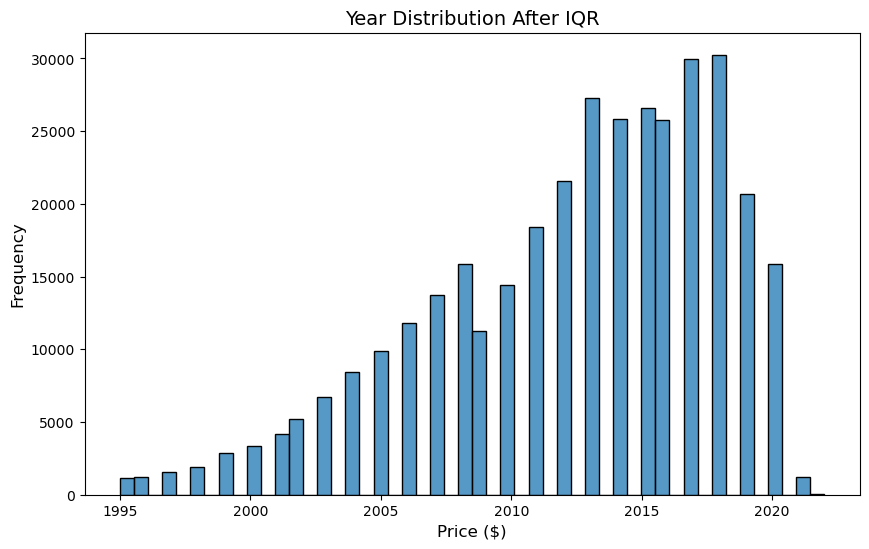

In [18]:
# Plot the distribution for price after removing rows with price == 0
plt.figure(figsize=(10, 6))
sns.histplot(data=used_cars_cleaned, x='year', kde=False, bins=50)
plt.title('Year Distribution After IQR', fontsize=14)
plt.xlabel('Price ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.ticklabel_format(style='plain', axis='x')  # Avoid scientific notation
plt.show()

Lastly, we need to address null values.

In [19]:
# Check for missing values, and express that as a percentage of the dataset
missing_percentage = used_cars_cleaned.isnull().sum()/len(used_cars_cleaned)*100

# Sort the percentages in descending order
sorted_missing_percentage = missing_percentage.sort_values(ascending=False)

# Display the sorted result
print(sorted_missing_percentage)

condition       37.604015
manufacturer     3.028521
title_status     1.682729
model            0.841365
fuel             0.573327
transmission     0.402477
region           0.000000
price            0.000000
year             0.000000
odometer         0.000000
state            0.000000
dtype: float64


For manufacturer and model , we will replace with a new value `unknown`  and `unknown_model`, for `title_status`, `fuel` and `transmission`, we will impute the most frequent value.

In [22]:
# Set unknown for missing condition
used_cars_cleaned['condition'].fillna('unknown', inplace=True)

# Set unknown manufacturers 
used_cars_cleaned['manufacturer'].fillna('unknown', inplace=True)

# Set unknown models
used_cars_cleaned['model'].fillna('unknown_model', inplace=True)

# Calculate the mode for the 'title_status' column
title_status_mode = used_cars_cleaned['title_status'].mode()[0]

# Impute missing values in 'title_status' with the mode
used_cars_cleaned['title_status'] = used_cars_cleaned['title_status'].fillna(title_status_mode)

# Calculate the mode for the 'fuel' column
fuel_mode = used_cars_cleaned['fuel'].mode()[0]

# Impute missing values in 'fuel' with the mode
used_cars_cleaned['fuel'] = used_cars_cleaned['fuel'].fillna(fuel_mode)

# Calculate the mode for the 'transmission' column
transmission_mode = used_cars_cleaned['transmission'].mode()[0]

# Impute missing values in 'transmission' with the mode
used_cars_cleaned['transmission'] = used_cars_cleaned['transmission'].fillna(transmission_mode)

/var/folders/t9/_hkshk3n1lgf0p7c36zk3c3m0000gn/T/ipykernel_4115/2844993300.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  used_cars_cleaned['condition'].fillna('unknown', inplace=True)
/var/folders/t9/_hkshk3n1lgf0p7c36zk3c3m0000gn/T/ipykernel_4115/2844993300.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting

To better interpert the year column, we can create a new column `age`, based on the current year 2024 minus the year.

In [23]:
current_year = 2024
used_cars_cleaned['age'] = current_year - used_cars_cleaned['year']
# Drop the 'year' column
used_cars_cleaned.drop(columns=['year'], inplace=True)


In [24]:
used_cars_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 357039 entries, 27 to 426879
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        357039 non-null  object 
 1   price         357039 non-null  int64  
 2   manufacturer  357039 non-null  object 
 3   model         357039 non-null  object 
 4   condition     357039 non-null  object 
 5   fuel          357039 non-null  object 
 6   odometer      357039 non-null  float64
 7   title_status  357039 non-null  object 
 8   transmission  357039 non-null  object 
 9   state         357039 non-null  object 
 10  age           357039 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 32.7+ MB


In [25]:
title_status_values = used_cars_cleaned['title_status'].unique()
condition_values = used_cars_cleaned['condition'].unique()

print("Unique values in 'title_status':", title_status_values)
print("Unique values in 'condition':", condition_values)

Unique values in 'title_status': ['clean' 'rebuilt' 'lien' 'salvage' 'missing' 'parts only']
Unique values in 'condition': ['good' 'excellent' 'fair' 'like new' 'unknown' 'new' 'salvage']


# Split the dataset
Now that we have cleaned the data, we will split the dataset into training and testing datasets

In [26]:
from sklearn.model_selection import train_test_split
X = used_cars_cleaned.drop('price', axis=1)


y = used_cars_cleaned['price']

# Split the data into training and test datasets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Pre Processing and Feature Engineering

In [27]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

# Apply StandardScaler to numerical features
numerical_cols = ['age', 'odometer']
numerical_transformer = StandardScaler()

# Apply OneHotEncoder to categorical features

nominal_cols = ['region', 'manufacturer', 'fuel', 'transmission', 'state']
nominal_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')

condition_order = ['unknown', 'salvage', 'fair', 'good', 'like new', 'excellent', 'new']
title_status_order = ['missing', 'parts only', 'salvage', 'lien', 'rebuilt', 'clean']

ordinal_cols = ['condition', 'title_status']
ordinal_categories = [
    condition_order,
    title_status_order
]

ordinal_transformer = OrdinalEncoder(categories=ordinal_categories, handle_unknown='use_encoded_value', unknown_value=-1)

# Create ColumnTransformer 

preprocessor = ColumnTransformer(
    transformers=[
        ('numerical', numerical_transformer, numerical_cols),
        ('nominal', nominal_transformer, nominal_cols),
        ('ordinal', ordinal_transformer, ordinal_cols)
    ]
)

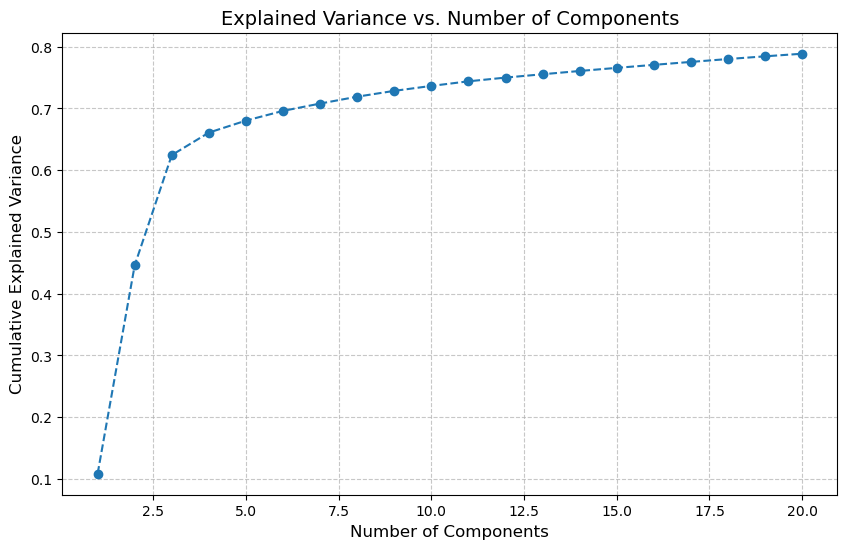

In [28]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline

# Create a TruncatedSVD instance
svd = TruncatedSVD(n_components=20, random_state=42)

# Combine the preprocessor and TruncatedSVD into a pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('svd', svd)
])

# Fit the pipeline on the training data
X_train_transformed = pipeline.fit_transform(X_train)

# Transform the test data using the same pipeline
X_test_transformed = pipeline.transform(X_test)

# Plot the cumulative explained variance ratio
explained_variance_ratio = svd.explained_variance_ratio_.cumsum()

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.xlabel('Number of Components', fontsize=12)
plt.ylabel('Cumulative Explained Variance', fontsize=12)
plt.title('Explained Variance vs. Number of Components', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Based on the explained varience vs the number of components, we will limit the dimensions to speed up processing.

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

First we will create a baseline model to compare against.

In [29]:
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

baseline_model = DummyRegressor(strategy='mean')  # Use 'mean' for regression
baseline_model.fit(X_train, y_train)

# Predict using the baseline model
y_pred_baseline = baseline_model.predict(X_test)

# Evaluate the baseline model
mse_baseline = mean_squared_error(y_test, y_pred_baseline)
r2_baseline = r2_score(y_test, y_pred_baseline)

print(f"Baseline Model Mean Squared Error (MSE): {mse_baseline:.2f}")
print(f"Baseline Model R² Score: {r2_baseline:.2f}")
# Evaluate the baseline model using MAE
mae_baseline = mean_absolute_error(y_test, y_pred_baseline)

print(f"Baseline Model Mean Absolute Error (MAE): {mae_baseline:.2f}")

Baseline Model Mean Squared Error (MSE): 160273271.49
Baseline Model R² Score: -0.00
Baseline Model Mean Absolute Error (MAE): 10559.65


Now that we have a baaseline, we will preform a Linear Regression

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Define the pipeline with PolynomialFeatures and LinearRegression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocessor pipeline
    ('scaler', StandardScaler(with_mean=False)),
    ('svd', TruncatedSVD(n_components=5, random_state=42)),  # Dimensionality reduction to 4 components
    ('poly', PolynomialFeatures()),  # Polynomial features
    ('linear_reg', LinearRegression())  # Linear regression
])

# Define the hyperparameter grid
param_grid = {
    'poly__degree': [1, 2, 3]  # Polynomial degrees to test
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(pipeline, param_grid, scoring='neg_mean_absolute_error', cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters and best pipeline
best_params = grid_search.best_params_
best_pipeline = grid_search.best_estimator_

# Evaluate the model on the test set
y_pred = best_pipeline.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Best Parameters for Linear Regression: {best_params}")
print(f"Best Linear Regression Model Mean Squared Error (MSE): {mse:.2f}")
print(f"Best Linear Regression Model R² Score: {r2:.2f}")
print(f"Best Linear Regression Model Mean Absolute Error (MAE): {mae:.2f}")

Best Parameters for Linear Regression: {'poly__degree': 3}
Best Linear Regression Model Mean Squared Error (MSE): 98592551.67
Best Linear Regression Model R² Score: 0.38
Best Linear Regression Model Mean Absolute Error (MAE): 7683.65


In [37]:
from sklearn.linear_model import Ridge
# Define the pipeline with PolynomialFeatures and Ridge Regression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),         # Preprocessor pipeline
    ('scaler', StandardScaler(with_mean=False)),  # Scaling for numerical features
    ('svd', TruncatedSVD(n_components=5, random_state=42)),  # Dimensionality reduction
    ('poly', PolynomialFeatures()),         # Polynomial features
    ('ridge', Ridge())                      # Ridge regression
])

# Define the hyperparameter grid
param_grid = {
    'poly__degree': [1, 2, 3],  # Polynomial degrees to test
    'ridge__alpha': [0.1, 1, 10, 100]  # Regularization strength for Ridge
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(pipeline, param_grid, scoring='neg_mean_absolute_error', cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters and best pipeline
best_params = grid_search.best_params_
best_pipeline = grid_search.best_estimator_

# Evaluate the model on the test set
y_pred = best_pipeline.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Best Ridge Parameters: {best_params}")
print(f"Best Ridge Model Mean Squared Error (MSE): {mse:.2f}")
print(f"Best Ridge Model R² Score: {r2:.2f}")
print(f"Best Ridge Model Mean Absolute Error (MAE): {mae:.2f}")


Best Ridge Parameters: {'poly__degree': 3, 'ridge__alpha': 0.1}
Best Ridge Model Mean Squared Error (MSE): 98291640.50
Best Ridge Model R² Score: 0.39
Best Ridge Model Mean Absolute Error (MAE): 7635.42


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Define the pipeline with PolynomialFeatures and Lasso Regression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),         # Preprocessor pipeline
    ('scaler', StandardScaler(with_mean=False)),  # Scaling for numerical features
    ('svd', TruncatedSVD(n_components=4, random_state=42)),  # Dimensionality reduction
    ('poly', PolynomialFeatures()),         # Polynomial features
    ('lasso', Lasso())        # Lasso regression
])

# Define the hyperparameter grid
param_grid = {
    'poly__degree': [1, 2, 3],  # Polynomial degrees to test
    'lasso__alpha': [0.01, 0.1, 1, 10, 100]  # Regularization strength for Lasso
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(pipeline, param_grid, scoring='neg_mean_absolute_error', cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters and best pipeline
best_params = grid_search.best_params_
best_pipeline = grid_search.best_estimator_

# Evaluate the model on the test set
y_pred = best_pipeline.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Best Lasso Parameters: {best_params}")
print(f"Best Lasso Model Mean Squared Error (MSE): {mse:.2f}")
print(f"Best Lasso Model R² Score: {r2:.2f}")
print(f"Best Lasso Model Mean Absolute Error (MAE): {mae:.2f}")


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.137e+13, tolerance: 3.440e+09
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.136e+13, tolerance: 3.435e+09
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.136e+13, toler

Best Lasso Parameters: {'lasso__alpha': 1, 'poly__degree': 3}
Best Lasso Model Mean Squared Error (MSE): 104250773.05
Best Lasso Model R² Score: 0.35
Best Lasso Model Mean Absolute Error (MAE): 7916.00


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.394e+13, tolerance: 4.296e+09
  model = cd_fast.enet_coordinate_descent(


| Model                       | Parameters                             | MSE           | R² Score | MAE      |
|-----------------------------|-----------------------------------------|---------------|----------|----------|
| Baseline Model              | N/A                                    | 160,273,271.49 | -0.00    | 10,559.65 |
| Best Linear Regression      | {'poly__degree': 3}                    | 98,592,551.67  | 0.38     | 7,683.65 |
| Best Ridge Regression       | {'poly__degree': 3, 'ridge__alpha': 0.1} | 98,291,640.50  | 0.39     | 7,635.42 |
| Best Lasso Regression       | {'lasso__alpha': 1, 'poly__degree': 3} | 104,250,773.05 | 0.35     | 7,916.00 |

### Analysis

- **Best Model**: **Ridge Regression**
  - Ridge Regression has the **lowest Mean Squared Error (MSE)** at 98,291,640.50, the **highest R² Score** at 0.39, and the **lowest Mean Absolute Error (MAE)** at 7,635.42.
  - This makes Ridge the most accurate and robust model for the dataset.

- **Linear Regression**:
  - Linear Regression performs slightly worse than Ridge, with an MSE of 98,592,551.67, an R² of 0.38, and an MAE of 7,683.65.

- **Lasso Regression**:
  - Lasso Regression shows the worst performance, with a higher MSE (104,250,773.05) and MAE (7,916.00).

### Recommendation

- Use **Ridge Regression** as the final model due to its superior performance metrics and ability to balance accuracy and regularization.


Best Parameters: {'poly__degree': 3, 'ridge__alpha': 0.1}
Mean Squared Error (MSE): 98291640.50
R² Score: 0.39
Mean Absolute Error (MAE): 7635.42

Top 10 Original Features Contributing to Key SVD Components:
numerical__age                 0.431468
nominal__transmission_other    0.430565
numerical__odometer            0.408227
nominal__fuel_other            0.365030
nominal__fuel_gas              0.311775
nominal__state_ca              0.280561
nominal__state_ma              0.267740
nominal__state_ks              0.257894
nominal__state_mi              0.239599
nominal__state_mt              0.232390
dtype: float64


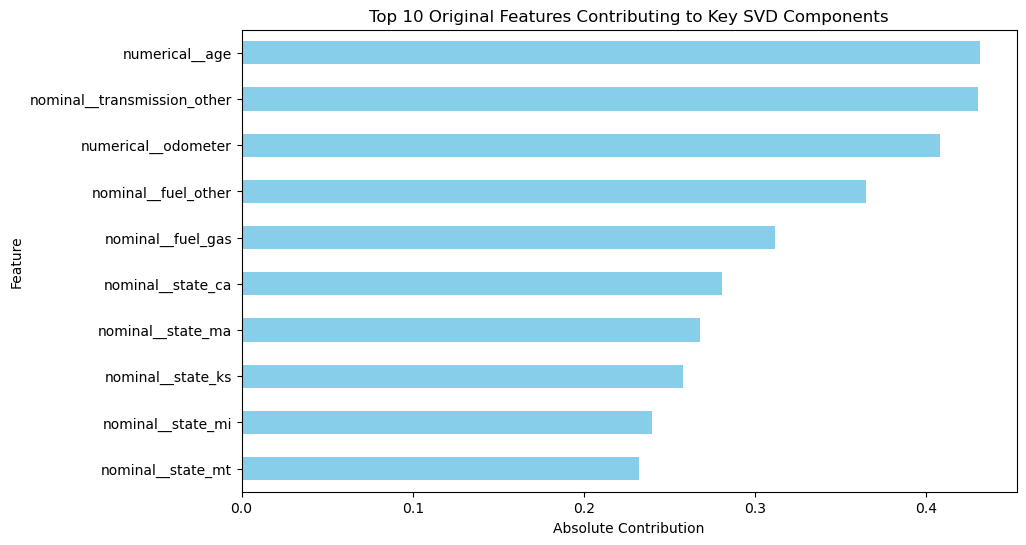

In [ ]:
from sklearn.linear_model import Ridge
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the pipeline with PolynomialFeatures and Ridge Regression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),         # Preprocessor pipeline
    ('scaler', StandardScaler(with_mean=False)),  # Scaling for numerical features
    ('svd', TruncatedSVD(n_components=5, random_state=42)),  # Dimensionality reduction
    ('poly', PolynomialFeatures()),         # Polynomial features
    ('ridge', Ridge())                      # Ridge regression
])

# Define the hyperparameter grid
param_grid = {
    'poly__degree': [3],  # Polynomial degrees to test
    'ridge__alpha': [0.1]  # Regularization strength for Ridge
}

grid_search = GridSearchCV(pipeline, param_grid, scoring='neg_mean_absolute_error', cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters and best pipeline
best_params = grid_search.best_params_
best_pipeline = grid_search.best_estimator_

# Evaluate the model on the test set
y_pred = best_pipeline.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Access the Ridge model and its coefficients
ridge_model = best_pipeline.named_steps['ridge']
ridge_coefficients = ridge_model.coef_

# Get feature names from PolynomialFeatures and TruncatedSVD
poly = best_pipeline.named_steps['poly']
svd = best_pipeline.named_steps['svd']

# Singular vectors from SVD
singular_vectors = svd.components_

# Original feature names after preprocessing
try:
    feature_names = best_pipeline.named_steps['preprocessor'].get_feature_names_out()
except AttributeError:
    feature_names = [f"Feature_{i}" for i in range(singular_vectors.shape[1])]

# Map SVD components back to original features
svd_contributions = pd.DataFrame(singular_vectors.T, index=feature_names, 
                                  columns=[f"SVD_Component_{i+1}" for i in range(svd.n_components)])

# Analyze contributions of original features to the top components
top_components = ['SVD_Component_2', 'SVD_Component_3']  #
contributions = svd_contributions[top_components].abs().sum(axis=1)
top_original_features = contributions.sort_values(ascending=False).head(10)

print("\nTop 10 Original Features Contributing to Key SVD Components:")
print(top_original_features)

# Visualize top original features
plt.figure(figsize=(10, 6))
top_original_features.plot(kind='barh', color='skyblue')
plt.title('Top 10 Original Features Contributing to Key SVD Components')
plt.xlabel('Absolute Contribution')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()


The analysis of the top 10 features contributing to SVD shows us that vehicle age and odometer are the most inflential on price. Transmission & fuel type other, likely signifying electric vehicles also has strong influence on pricing. Geographical factors also contribute meaningfully in pricing.

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

The findings highlight that key numerical features like age and odometer dominate the representation of car pricing, alongside categorical factors such as transmission type, fuel type, and regional location. This combination suggests that both vehicle characteristics and external market conditions are important in modeling used car data. 